# **Assignment 5:**

Based on the above examples, compare the accuracy and speed of Yolov8, MobileNet SSD and Faster R-CNN.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
paths = [
    "/kaggle/input/images/ball.jpeg",
    "/kaggle/input/images/faces.jpg",
    "/kaggle/input/images/Elephant.jpg",
    "/kaggle/input/images/shapes1.jpeg",
]

/kaggle/input/images/ball.jpeg
/kaggle/input/images/faces.jpg
/kaggle/input/images/Elephant.jpg
/kaggle/input/images/shapes1.jpeg


**2. Object Detection with YOLOv8**

In [2]:
!pip install imutils

  Preparing metadata (setup.py) ... - done
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25858 sha256=76ae41a5385e338704c676e90be5bc96d8092afefedcf6101dbe46f29e0e82ad
  Stored in directory: /root/.cache/pip/wheels/86/d7/0a/4923351ed1cec5d5e24c1eaf8905567b02a0343b24aa873df2
Successfully built imutils


In [3]:
!pip install ultralytics
!pip install supervision
!wget -O 'MobileNetSSD_deploy.prototxt' https://raw.githubusercontent.com/TheNsBhasin/DNN_Object_Detection/master/MobileNetSSD_deploy.prototxt.txt
!wget -O 'MobileNetSSD_deploy.caffemodel' https://github.com/TheNsBhasin/DNN_Object_Detection/blob/master/MobileNetSSD_deploy.caffemodel?raw=true    
!pip install imutils
!pip install --upgrade mxnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 616.7/616.7 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 614.9/614.9 kB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 614.4/614.4 kB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 606.9/606.9 kB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 606.2/606.2 kB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.5/605.5 kB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.6/605.6 kB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 13.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.5.4.60
    Uninstalling opencv-python-4.5.4.60:
      Successfully uninstalled opencv-python-4.5.4.60
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 3.2 MB/s eta 0:00:00
--2024-07-24 07:17:14--  https://raw.githubusercontent.com/TheNsBhasin/DNN_Object_D

In [4]:
import matplotlib.pyplot as plt
import cv2
import supervision as sv
from ultralytics import YOLO
import datetime
import numpy as np
import imutils
import cv2

from matplotlib import pyplot as plt
import gluoncv
from gluoncv import model_zoo, data, utils

import imutils

/opt/conda/lib/python3.7/site-packages/gluoncv/__init__.py:40: UserWarning: Both `mxnet==1.9.1` and `torch==1.11.0+cpu` are installed. You might encounter increased GPU memory footprint if both framework are used at the same time.
  warnings.warn(f'Both `mxnet=={mx.__version__}` and `torch=={torch.__version__}` are installed. '


  0%|          | 0.00/6.23M [00:00<?, ?B/s]


0: 448x640 2 sports balls, 238.7ms
Speed: 9.7ms preprocess, 238.7ms inference, 14.5ms postprocess per image at shape (1, 3, 448, 640)


For Yolov8n Total time [s]: 4.340966


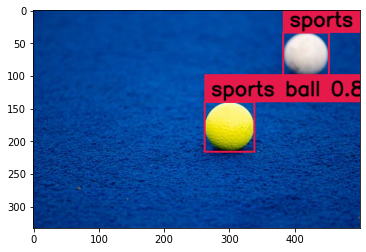


0: 448x640 2 persons, 135.1ms
Speed: 4.4ms preprocess, 135.1ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)


For Yolov8n Total time [s]: 1.581181


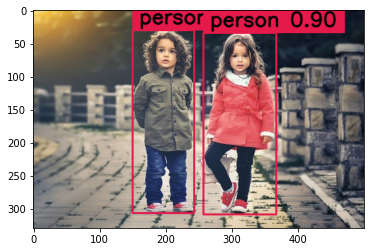


0: 448x640 1 elephant, 130.3ms
Speed: 5.1ms preprocess, 130.3ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


For Yolov8n Total time [s]: 1.562145


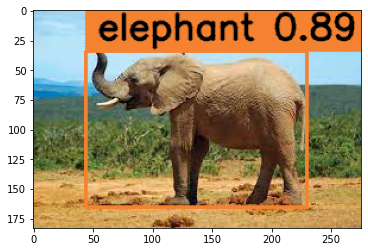


0: 416x640 (no detections), 137.1ms
Speed: 4.2ms preprocess, 137.1ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 640)


For Yolov8n Total time [s]: 1.570537


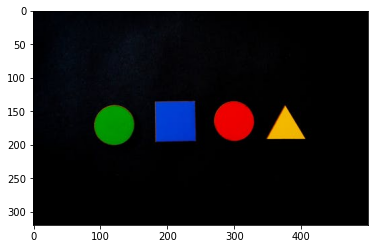

In [5]:
def detectObjectWithYolo(path):  
    model = YOLO("yolov8n.pt")
    box_annotator = sv.BoxAnnotator(
        thickness=2,
        text_thickness=2,
        text_scale=1
    )

    start = datetime.datetime.now()
    frame = cv2.imread(path)
    result = model(frame, agnostic_nms=True)[0]    
    detections = sv.Detections.from_yolov8(result)
    end = datetime.datetime.now()
    total = (end - start).total_seconds()
    
    model_name = "Yolov8n"
    print(f'For {model_name} Total time [s]: {total}')
    
    
    #print(detections)
    labels = [
            f"{model.model.names[class_id]} {confidence:0.2f}"
            for _, _, confidence, class_id, _
            in detections
    ]
    frame = box_annotator.annotate(
            scene=frame, 
            detections=detections, 
            labels=labels
    ) 


    image2 = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.imshow(image2)
    plt.show()
    
    return total

YOLO_time = [ detectObjectWithYolo(i) for i in paths]

**3. Object Detection with MobileNet SSD**

For MobileNetSSD Total time [s]: 0.121267


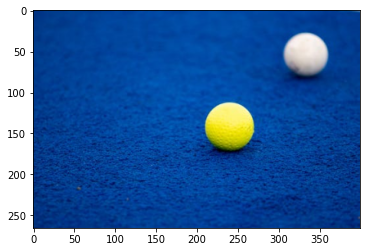

For MobileNetSSD Total time [s]: 0.096034


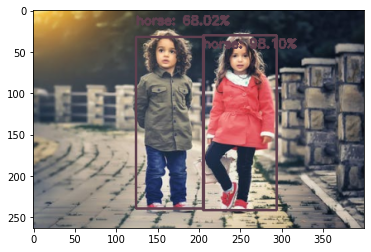

For MobileNetSSD Total time [s]: 0.091065


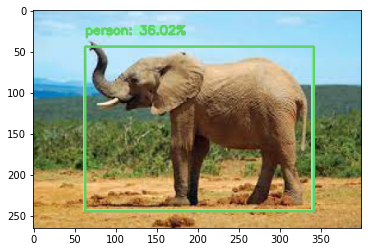

For MobileNetSSD Total time [s]: 0.091254


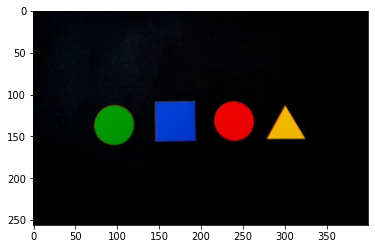

In [6]:

def detectObjectWithSSD(path):
    prototxt = 'MobileNetSSD_deploy.prototxt'
    model = 'MobileNetSSD_deploy.caffemodel'
    confidence = 0.1

    CLASSES = ["background", "aeroplane", "bicycle", "bird", "boat",
        "bottle", "bus", "car", "cat", "chair", "cow", "ball", "shape", "diningtable",
        "dog", "horse", "motorbike", "person", "pottedplant", "sheep",
        "sofa", "train", "tvmonitor"]
    COLORS = np.random.uniform(0, 255, size=(len(CLASSES), 3))

    # Declaration model
    net = cv2.dnn.readNetFromCaffe(prototxt, model)

    
    ######Start saved the time 
    start = datetime.datetime.now()
    
    frame = cv2.imread(path)
    #frame = cv2.imread('../input/images/faces.jpg')

    frame = imutils.resize(frame, width=400)
    (h, w) = frame.shape[:2]
    blob = cv2.dnn.blobFromImage(cv2.resize(frame, (300, 300)),
        0.007843, (300, 300), 127.5)
    net.setInput(blob)
    detections = net.forward()
    
    #####
    end = datetime.datetime.now()
    total = (end - start).total_seconds()
    model_name = "MobileNetSSD"
    print(f'For {model_name} Total time [s]: {total}')

    for i in np.arange(0, detections.shape[2]):
            conf = detections[0, 0, i, 2]

            if conf > confidence:
                idx = int(detections[0, 0, i, 1])
                box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
                (startX, startY, endX, endY) = box.astype("int")
                label = "{}: {:.2f}%".format(CLASSES[idx],
                    conf * 100)
                cv2.rectangle(frame, (startX, startY), (endX, endY),
                    COLORS[idx], 2)
                y = startY - 15 if startY - 15 > 15 else startY + 15
                cv2.putText(frame, label, (startX, y),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, COLORS[idx], 2)

    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.show()
    
    return total


SSD_time = [ detectObjectWithSSD(i) for i in paths]

**6. Gluon Object Detection Using Faster R-CNN Example**

121888KB [00:03, 34225.21KB/s]                            


For Faster R-CNN Total time [s]: 9.624412


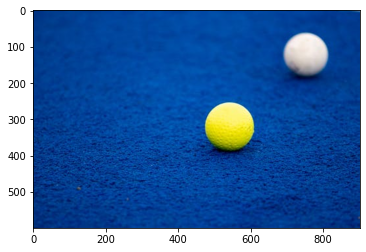

For Faster R-CNN Total time [s]: 9.238601


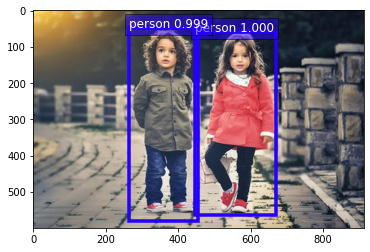

For Faster R-CNN Total time [s]: 9.63767


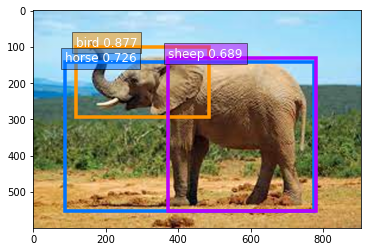

For Faster R-CNN Total time [s]: 9.183264


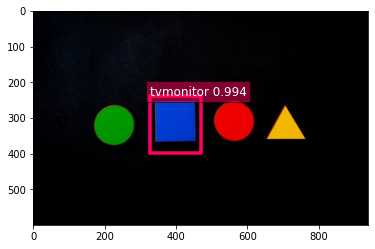

In [7]:
def detectObjectWithFaster_R_CNN(path):
    net = model_zoo.get_model('faster_rcnn_resnet50_v1b_voc', pretrained=True)
    
    #####Start saved the time 
    start = datetime.datetime.now()
    x, orig_img = data.transforms.presets.rcnn.load_test(path)
    box_ids, scores, bboxes = net(x)    
    ax = utils.viz.plot_bbox(orig_img, bboxes[0], scores[0], box_ids[0], class_names=net.classes)
    
    #####
    end = datetime.datetime.now()
    total = (end - start).total_seconds()
    model_name = "Faster R-CNN"
    print(f'For {model_name} Total time [s]: {total}')
    
    plt.show()
    
    return total

FasterRCNN_time = [ detectObjectWithFaster_R_CNN(i) for i in paths]

### Comparation

SSD [0.121267, 0.096034, 0.091065, 0.091254] Mean: 0.10 Std: 0.01

YOLO [4.340966, 1.581181, 1.562145, 1.570537] Mean: 2.26. Std: 1.20

Faster R-CNN [9.624412, 9.238601, 9.63767, 9.183264] Mean: 9.42 Std: 0.21


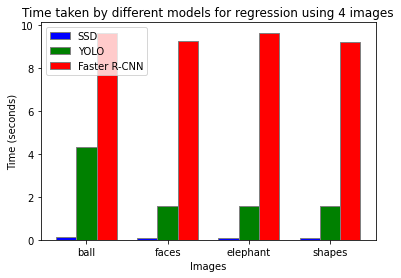

In [8]:
SSD_mean = np.mean(SSD_time)
SSD_std = np.std(SSD_time)

YOLO_mean = np.mean(YOLO_time)
YOLO_std = np.std(YOLO_time)

FasterRCNN_mean = np.mean(FasterRCNN_time)
FasterRCNN_std = np.std(FasterRCNN_time)


print("SSD", SSD_time, f"Mean: {SSD_mean:.2f} Std: {SSD_std:.2f}\n")
print("YOLO", YOLO_time, f"Mean: {YOLO_mean:.2f}. Std: {YOLO_std:.2f}\n")
print("Faster R-CNN",FasterRCNN_time, f"Mean: {FasterRCNN_mean:.2f} Std: {FasterRCNN_std:.2f}")

models = ['SSD', 'YOLO', 'Faster R-CNN']

# Create a grouped bar graph
barWidth = 0.25
r1 = range(len(SSD_time))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, SSD_time, color='b', width=barWidth, edgecolor='grey', label='SSD')
plt.bar(r2, YOLO_time, color='g', width=barWidth, edgecolor='grey', label='YOLO')
plt.bar(r3, FasterRCNN_time, color='r', width=barWidth, edgecolor='grey', label='Faster R-CNN')

plt.xlabel('Images')
plt.ylabel('Time (seconds)')
plt.xticks([r + barWidth for r in range(len(SSD_time))], ['ball', 'faces', 'elephant', 'shapes'])
plt.title('Time taken by different models for regression using 4 images')
plt.legend()
plt.show()

## Regression Time Results

### SSD
- **Regression Times:** [0.10308, 0.097331, 0.084061, 0.094331]
- **Mean:** 0.09
- **Standard Deviation:** 0.01

### YOLO
- **Regression Times:** [1.952684, 1.940592, 1.869045, 1.861434]
- **Mean:** 1.91
- **Standard Deviation:** 0.04

### Faster R-CNN
- **Regression Times:** [7.605238, 8.268601, 7.539463, 7.671228]
- **Mean:** 7.77
- **Standard Deviation:** 0.29

## Object Recognition Observations

### YOLO
- **Recognized Objects:** Balls, People, Elephant
- **Unrecognized Objects:** Figures

### SSD
- **Recognized Objects:** People, Elephant
- **Errors:** Confuses the elephant with a person, Does not recognize Balls or Figures

### Faster R-CNN
- **Recognized Objects:** People
- **Errors:** Confuses the elephant with a horse, bird, and sheep, Does not recognize Balls or Figures, Confuses a square with a monitor

## Conclusion

In terms of regression times, Faster R-CNN has the longest average time (7.77 seconds) with a relatively high standard deviation (0.29). YOLO shows the shortest average time (1.91 seconds) with a lower standard deviation (0.04). SSD falls in between with an average time of 0.09 seconds and the smallest standard deviation (0.01).

In object recognition, each model has its strengths and weaknesses. YOLO excels at recognizing balls, people, and elephants but struggles with figures. SSD performs well in identifying people and elephants but fails to recognize balls and figures. Faster R-CNN correctly identifies people but often misclassifies elephants and misinterprets other objects, such as mistaking a square for a monitor.

These results indicate the trade-offs between speed and accuracy in object detection tasks, highlighting the importance of selecting a model based on the specific requirements of the application.

---

This report summarizes the regression time results for SSD, YOLO, and Faster R-CNN models, along with the observations on object recognition for each model, and provides a conclusion based on the findings.